# National Assembly of pakistan 
### winning candidates  in 2018  Analysis

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# read the data with pandas 
df = pd.read_excel("NA_list.xlsx")
df.head()

,NA Seat,Name,Party,Profession/Education,Address,Contact
0,NA-1Chitral,Moulana Abdul Akbar Chitrali,MMAP,B.ED,"Village Broze Goldeh, Tehsil & District Chitra...","0345-9411119, 0333-9100811"
1,NA-2Swat-I,Dr. Haider Ali Khan,PTI,MBBS,"Khawza Khela, Swat. C-302, Parliament Lodges,...","0946-745333, 0300-5749444"
2,NA-3Swat-II,Mr. Saleem Rehman,PTI,FA,"Shandara Mingora, Tehsil Babuzai, District Swa...","0946-722335, 0333-9279679"
3,NA-4Swat-III,Mr. Murad Saeed,PTI,Bachelor in Environmental Sciences,Mohalla Sher Mohd Sher Village and P.O. Kabal...,0300-0848410
4,NA-5Upper Dir,Sahibzada Sibghatullah,PTI,M.A in Political Science,"Village Kotkey Sahib Abad Wari. H-412, Parlia...","0944-884005, 0313-8802230, 0343-8802230"


In [3]:
df.shape

(340, 6)

In [4]:
df.isnull().sum()

NA Seat                  0
Name                     0
Party                    0
Profession/Education     0
Address                  0
Contact                 89
dtype: int64

In [5]:
# Remove the contact column 
df = df.drop(['Contact'],axis=1)
df.columns

Index(['NA Seat', 'Name', 'Party', 'Profession/Education', 'Address'], dtype='object')

In [6]:
# Rename the column names
df.rename(columns={'NA Seat':'NA_Seat'},inplace =True)
df.rename(columns ={'Profession/Education':'Education'},inplace=True)

In [7]:
df.shape

(340, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   NA_Seat    340 non-null    object
 1   Name       340 non-null    object
 2   Party      340 non-null    object
 3   Education  340 non-null    object
 4   Address    340 non-null    object
dtypes: object(5)
memory usage: 13.4+ KB


In [9]:
## space Removes
df.replace(' ', '_', regex=True,inplace =True)

In [10]:
# df.nunique()

#### Graph Show PTI is the leading the Election Won 155  Seat

In [11]:
import plotly.express as px

fig = px.histogram(df, x="Party",color="Party", text_auto=True,
            labels={"Party":"Political Parties" }).update_xaxes(categoryorder='total descending')
fig.update_layout(yaxis={'title': 'Number of Candidates'})
fig.update_layout(title_text="Pakistan National Assembly 2018 Elections Results", title_x=0.5)
fig.update(layout_showlegend=False)   
fig.update_layout(
    font_family="Courier New",
    font_color="blue",font_size=15,
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green")
                  
fig.show()


In [12]:
# Groupby the members using party Columns
party_seat = df.groupby('Party')['NA_Seat'].count().sort_values(ascending=False)
# Convert Group values into pandas data frame
party_df = pd.DataFrame({'Party':party_seat.index,'MNA':party_seat.values})
party_df

,Party,MNA
0,PTI,155
1,PML-N,84
2,PPPP,56
3,MMAP,15
4,MQMP,6
5,BAP,5
6,PML,5
7,BNP,4
8,Ind,4
9,GDA,3


In [13]:
import plotly.express as px
fig= px.pie(party_df,values='MNA', 
            labels='Party',hover_name='Party',names='Party',width=1000, height=600
            )
fig.update(layout_showlegend=False)  
fig.update_traces(textposition='inside', textinfo='percent')
fig.update_layout(title_text="National Assembly Seat Percentage%", title_x=0.5)
fig.show()

In [14]:
# df["Education"] = df["Education"].apply(lambda x: x.replace("Information Tehnology", "IT"))
# df["Education"] = df["Education"].apply(lambda x: x.replace("BS_in_Arts","BA"))
# df["Education"] = df["Education"].apply(lambda x: x.replace("BSc_in_Electrical_Eng","BSC(Electrical_Eng)"))

# df["Education"] = df["Education"].apply(lambda x: x.replace("BAs_in_Economics_and_Political_Science","BA(Economics_&_Political_Science)"))
# df["Education"] = df["Education"].apply(lambda x: x.replace("'Master_in_Arts'","MA"))
# df["Education"] = df["Education"].apply(lambda x: x.replace("BA_of_Arts","BA"))
# df["Education"] = df["Education"].apply(lambda x: x.replace("Master_of_Science_in_Economics","MA(Economics)"))
# df["Education"] = df["Education"].apply(lambda x: x.replace("Bachelor_of_Engineering_in_Mechanical_Engineering","BSC(Mechanical_Eng)"))
# df["Education"] = test["Education"].apply(lambda x: x.replace("Bachelors_in_Arts_","Bachelors_in_Arts"))

In [15]:
import plotly.express as px

fig = px.histogram(df, x="Education",color="Education",text_auto=True,width=1500, height=1000,
            labels={"Party":"Political Parties" },
                 #  title="Member of National Assembly Education Degree",
                   ).update_xaxes(categoryorder='total descending')
fig.update_layout(title_text="Qualification of Members of National Assembly ", title_x=0.5)
fig.update_layout(
    font_family="Courier New",
    font_color="blue",font_size=18,
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green")
fig.update_layout(yaxis={'title': 'Number of Candidates'}
)
fig.update(layout_showlegend=False)                  
fig.show()

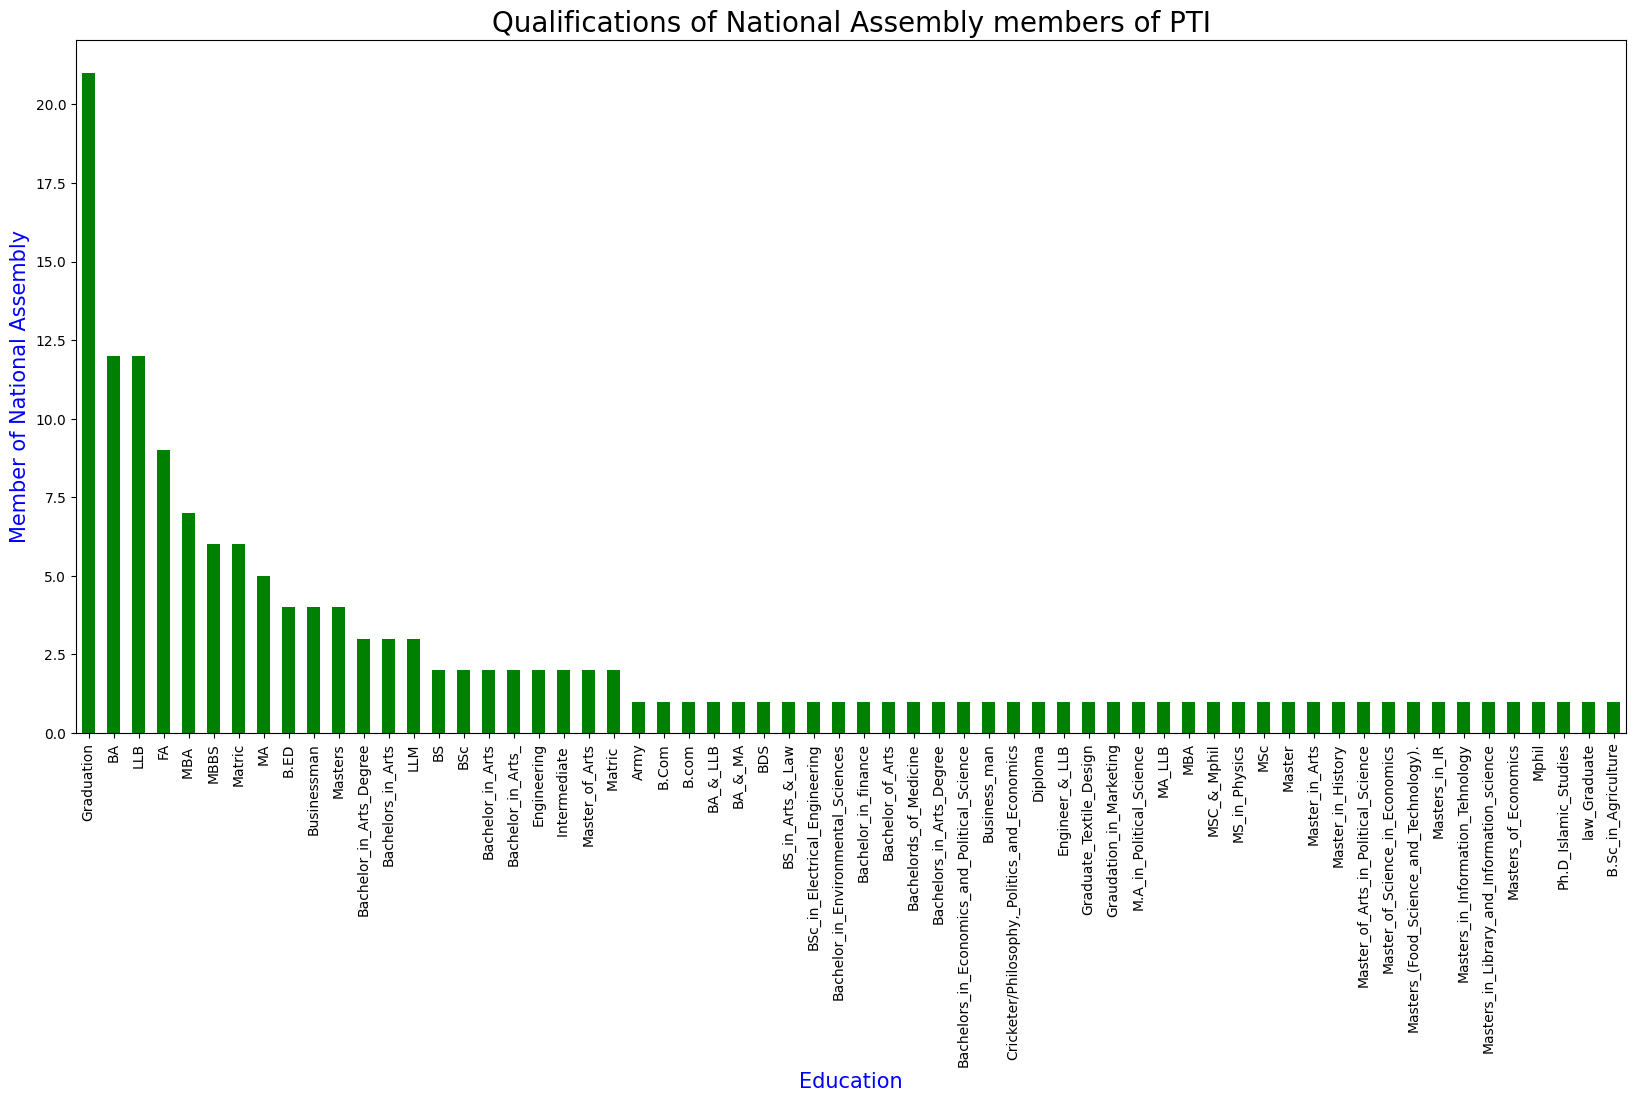

In [16]:
plt.figure(figsize=(20, 9))
df.groupby('Party')['Education'].value_counts().loc['PTI'].plot.bar(color='green')
plt.xlabel("Education", fontsize=15,color='blue')
plt.ylabel("Member of National Assembly",fontsize=15,color='blue')
plt.title('Qualifications of National Assembly members of PTI', size = 20)
plt.show()

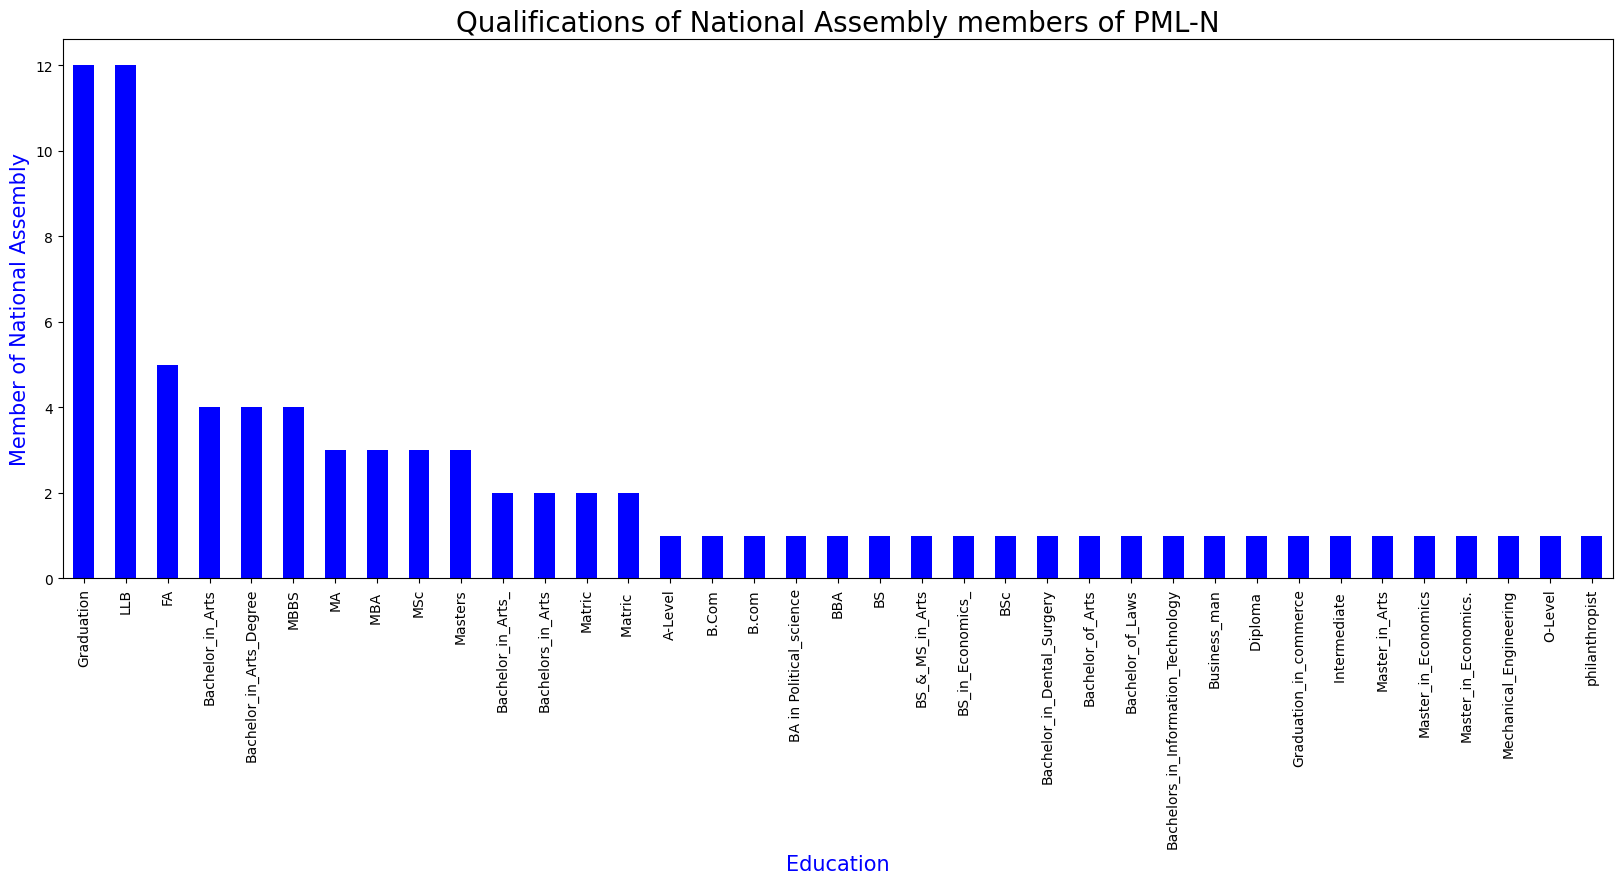

In [17]:
plt.figure(figsize=(20, 7))
plt.xlabel("Education", fontsize=15,color='blue')
plt.ylabel("Member of National Assembly",fontsize=15,color='blue')
df.groupby('Party')['Education'].value_counts().loc['PML-N'].plot.bar(color='blue')
plt.title('Qualifications of National Assembly members of PML-N', size = 20)
plt.show()